<a href="https://colab.research.google.com/github/deltorobarba/finance/blob/main/beta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Beta (Systematic Risk)**

In [ ]:
!pip install yfinance pandas matplotlib -q

[*********************100%***********************]  2 of 2 completed


Beta of AAPL relative to SPY: 1.2206


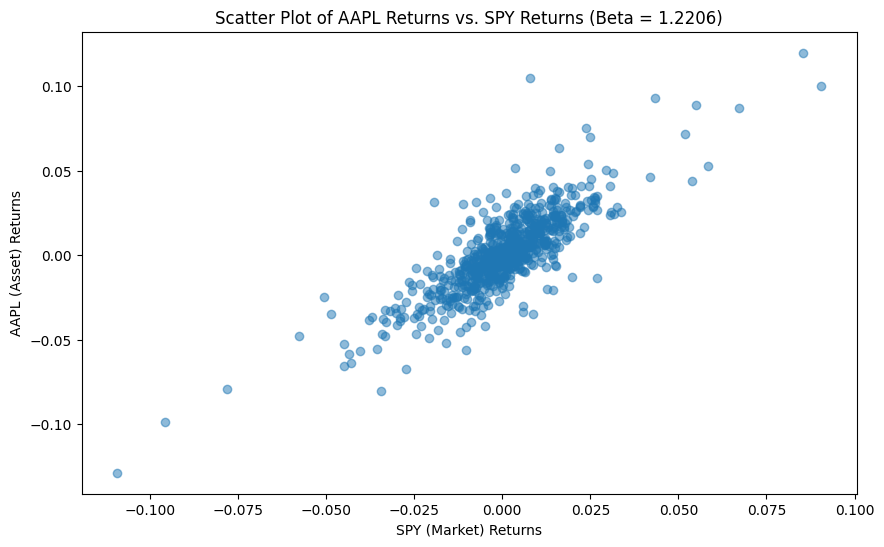

In [3]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Download historical data for Apple (AAPL) and S&P 500 (SPY)
tickers = ["AAPL", "SPY"]  # SPY is an ETF tracking the S&P 500 index
data = yf.download(tickers, start="2020-01-01", end="2023-01-01")['Adj Close']

# Calculate daily returns
returns = data.pct_change().dropna()

# Separate the returns for Apple and the S&P 500
asset_returns = returns['AAPL']
market_returns = returns['SPY']

# Calculate covariance between the asset and the market
cov_matrix = np.cov(asset_returns, market_returns)
cov_asset_market = cov_matrix[0, 1]  # Covariance between asset and market

# Calculate variance of the market
var_market = np.var(market_returns)

# Calculate Beta
beta = cov_asset_market / var_market
print(f"Beta of AAPL relative to SPY: {beta:.4f}")

# Plot the returns of the asset and the market to visualize
plt.figure(figsize=(10, 6))
plt.scatter(market_returns, asset_returns, alpha=0.5)
plt.title(f"Scatter Plot of AAPL Returns vs. SPY Returns (Beta = {beta:.4f})")
plt.xlabel("SPY (Market) Returns")
plt.ylabel("AAPL (Asset) Returns")
plt.show()


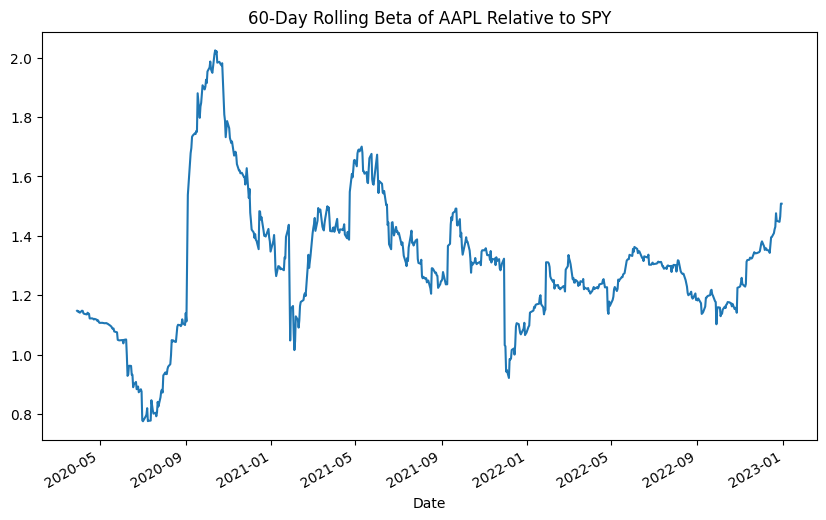

In [4]:
rolling_beta = asset_returns.rolling(window=60).cov(market_returns).div(market_returns.rolling(window=60).var())
rolling_beta.plot(figsize=(10, 6), title="60-Day Rolling Beta of AAPL Relative to SPY")
plt.show()